### Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

### Importing the SKLearn Library

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

### Importing StatsModel Library

In [3]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
#Ignoring the warnings

import warnings
warnings.filterwarnings("ignore")

In [5]:
#Changing settings to see maximum data 

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

## Step 1: Reading the Dataset and Initial Understanding

In [6]:
#Reading the dataset

bikedata_raw = pd.read_csv(r"C:\Users\Anurag Pal\Desktop\upGrad\Machine Learning\Assignments\Data\day.csv")

In [7]:
#Checking the first few rows of the data

bikedata_raw.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
#Checking the number of rows and columns of the dataset

bikedata_raw.shape

(730, 16)

In [9]:
#Checking the datatype of the columns in the dataset

bikedata_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
#Checking the summary of the dataset

bikedata_raw.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Dataset Cleaning and Dataset Transformation before EDA 

In [11]:
#Checking null values in the dataset

bikedata_raw.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### *Inference: There are no null values present in any of the columns of the dataset.*

In [12]:
#Creating a new dataset from "bikedata_raw" to check for duplicates

bikedata_dup_check = bikedata_raw

In [13]:
#Dropping duplicates

bikedata_dup_check.drop_duplicates().shape

(730, 16)

In [14]:
#Comparing if the shape of the new dataset after removing the duplicates is the sames as that of the "bikedata_raw"

bikedata_dup_check.drop_duplicates().shape == bikedata_raw.shape

True

#### *Inference: As the shape of the dataset remains same after dropping duplicates, it means that there are no duplicate rows present in dataset.*

### Removing Unwanted Columns

1. **instant**: Column is basically an index column that counts the number of rows
2. **dteday**: Column contains the date in long format (dd-mm-yyyy). However, we already have the month and year information present in separate columns. We will extract the "day" value from this column and then can proceed to drop this column.
3. **casual** and **registered**: As per the data dictionary, the addition of two columns forms the "cnt" column. We will drop these columns as the objective is to predict the total demand for shared bikes. Also, we will have to drop these columns anyhow during the Multicollinearity check.

In [15]:
#Creating a new column "day" on the basis of "dteday" by splitting at delimiter and picking up the first value

bikedata_raw["day"] = bikedata_raw["dteday"].str.split("-").str[0]

In [16]:
#Creating a list to drop the columns

unwanted_columns = ["instant", "dteday", "casual", "registered"]

#Dropping the columns from the dataset

bikedata_cols_drop = bikedata_raw.drop(unwanted_columns, axis=1)

In [17]:
bikedata_cols_drop.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day'],
      dtype='object')

In [18]:
#Renaming the column names for better understanding

bikedata_renamed = bikedata_cols_drop.rename(columns={"yr" : "year", "mnth" : "month", "atemp" : "feeling_temp", 
                                                      "hum" : "humidity", "cnt" : "count_of_bike"})

In [19]:
#Checking if the columns have been renamed or not

bikedata_renamed.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feeling_temp,humidity,windspeed,count_of_bike,day
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,01
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,02
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,03
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,04
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,05


### Changing the encoding of few columns for better understanding of the columns

In [20]:
#Changing the encoding of "season" column
bikedata_renamed["season"] = bikedata_renamed["season"].map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"})

#Changing the encoding of "month" column
bikedata_renamed["month"] = bikedata_renamed["month"].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"June", 7:"July", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})

#Changing the encoding of "weekday" column
bikedata_renamed["weekday"] = bikedata_renamed["weekday"].map({0:"Sun", 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat"})

#Changing the encoding of "weathersit" column
bikedata_renamed["weathersit"] = bikedata_renamed["weathersit"].map({1:"Clear", 2:"Misty", 3:"Light_Showers", 4:"Heavy_Showers"})

In [21]:
#Checking if all the encodings have been changed or not

bikedata_renamed.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feeling_temp,humidity,windspeed,count_of_bike,day
0,Spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985,01
1,Spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801,02
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,03
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,04
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,05


In [22]:
#Checking the datatype of all the columns

bikedata_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         730 non-null    object 
 1   year           730 non-null    int64  
 2   month          730 non-null    object 
 3   holiday        730 non-null    int64  
 4   weekday        730 non-null    object 
 5   workingday     730 non-null    int64  
 6   weathersit     730 non-null    object 
 7   temp           730 non-null    float64
 8   feeling_temp   730 non-null    float64
 9   humidity       730 non-null    float64
 10  windspeed      730 non-null    float64
 11  count_of_bike  730 non-null    int64  
 12  day            730 non-null    object 
dtypes: float64(4), int64(4), object(5)
memory usage: 74.3+ KB


## Step 3: Data Visualization

### i) Visualising Categorical Variables

##### a) Checking the total count of rental bikes at an yearly level

In [23]:
bikedata_renamed.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'feeling_temp', 'humidity', 'windspeed',
       'count_of_bike', 'day'],
      dtype='object')

In [24]:
yearly_total = bikedata_renamed.groupby("year")["count_of_bike"].sum().reset_index()
yearly_total['count_of_bike'] = yearly_total['count_of_bike'] / 1000000

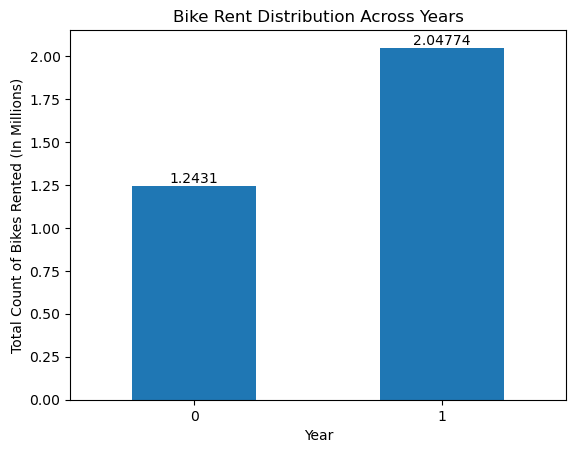

In [25]:
#Plotting the Bargraph to show the distribution
ax = yearly_total.plot.bar(x='year', y='count_of_bike', legend=False)
plt.title('Bike Rent Distribution Across Years')
ax.set(xlabel='Year')
ax.set(ylabel='Total Count of Bikes Rented (In Millions)')
#Showcasing the labels of the values
ax.bar_label(ax.containers[0])
#Making x-ticklabels Horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

##### Note: 
- *0: 2018*
- *1: 2019*

##### Inference: 
*Number of bikes rented in 2019 are more than that of 2018*

##### b) Checking the total count of rental bikes at an monthly level

In [26]:
def category_column_graphs(dataframe, column):
    plt.figure(figsize = (20,10))
    plt.subplot(1,2,1)
    #Plotting a Barplot at overall level
    sns.barplot(column,"count_of_bike", data=dataframe, ci=None, palette="RdYlGn")
    plt.xlabel(column)
    plt.ylabel("Total Count of Bikes Rented (In Thousands)")
    
    plt.subplot(1,2,2)
    #Plotting a Barplot at yearly level
    sns.barplot(column,"count_of_bike", data=dataframe, hue="year", ci=None)
    plt.legend(loc="upper right")
    plt.xlabel(column)
    plt.ylabel("Total Count of Bikes Rented (In Thousands)")
    plt.show()

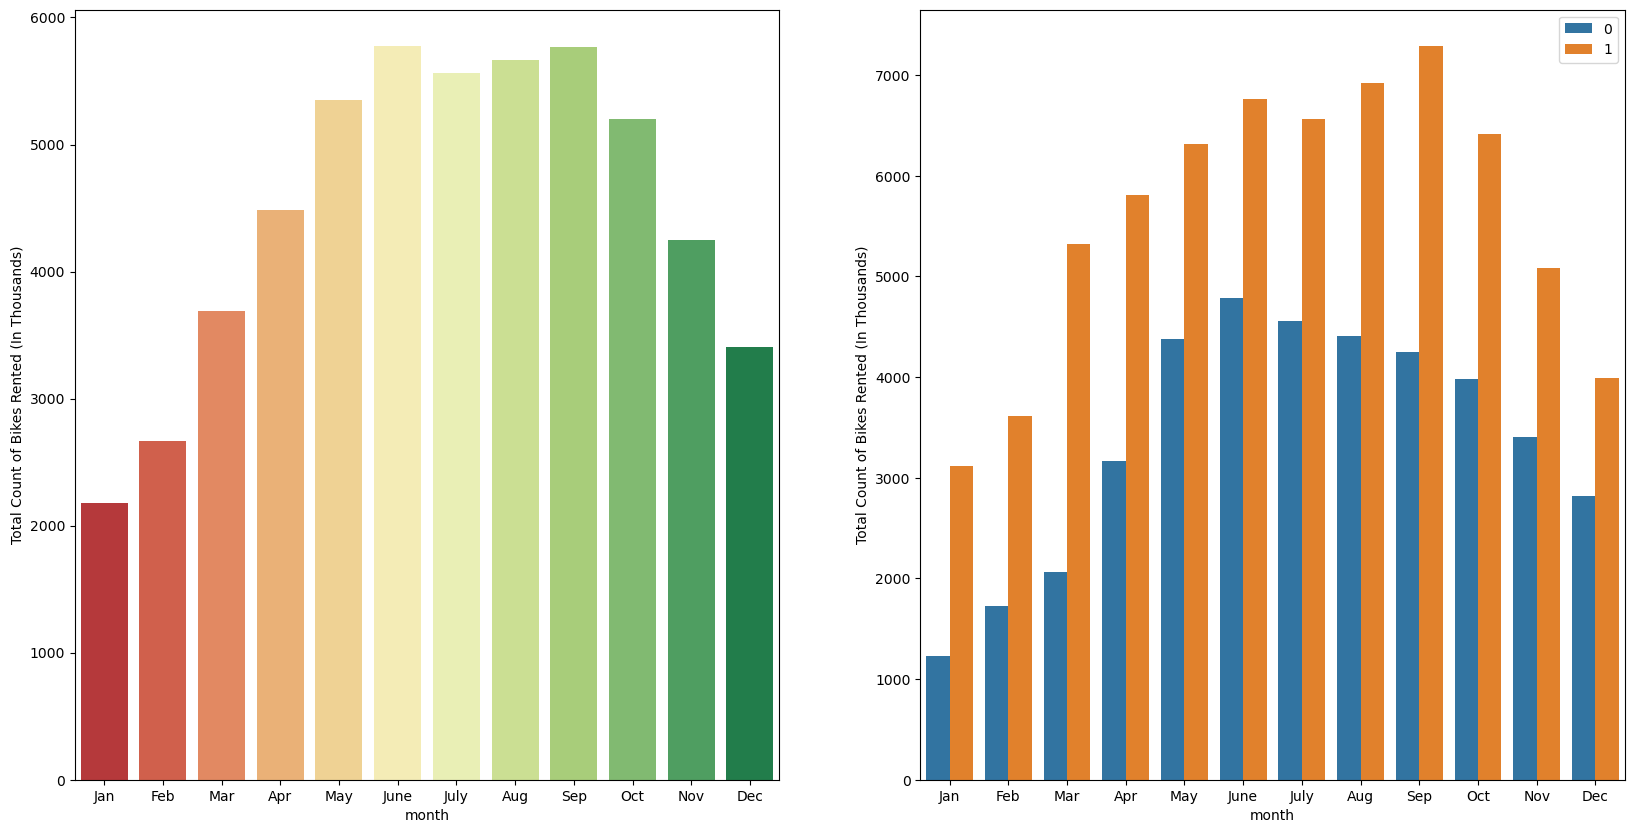

In [27]:
category_column_graphs(bikedata_renamed, "month")

##### *Inference:*

*1. Majority of the booking happen from May-September.*

*2. In comparison to 2018, bike bookings have seen growth for every month throughout 2019.*

##### Note: 
- *0: 2018*
- *1: 2019*

##### c) Checking the total count of rental bikes on weekdays

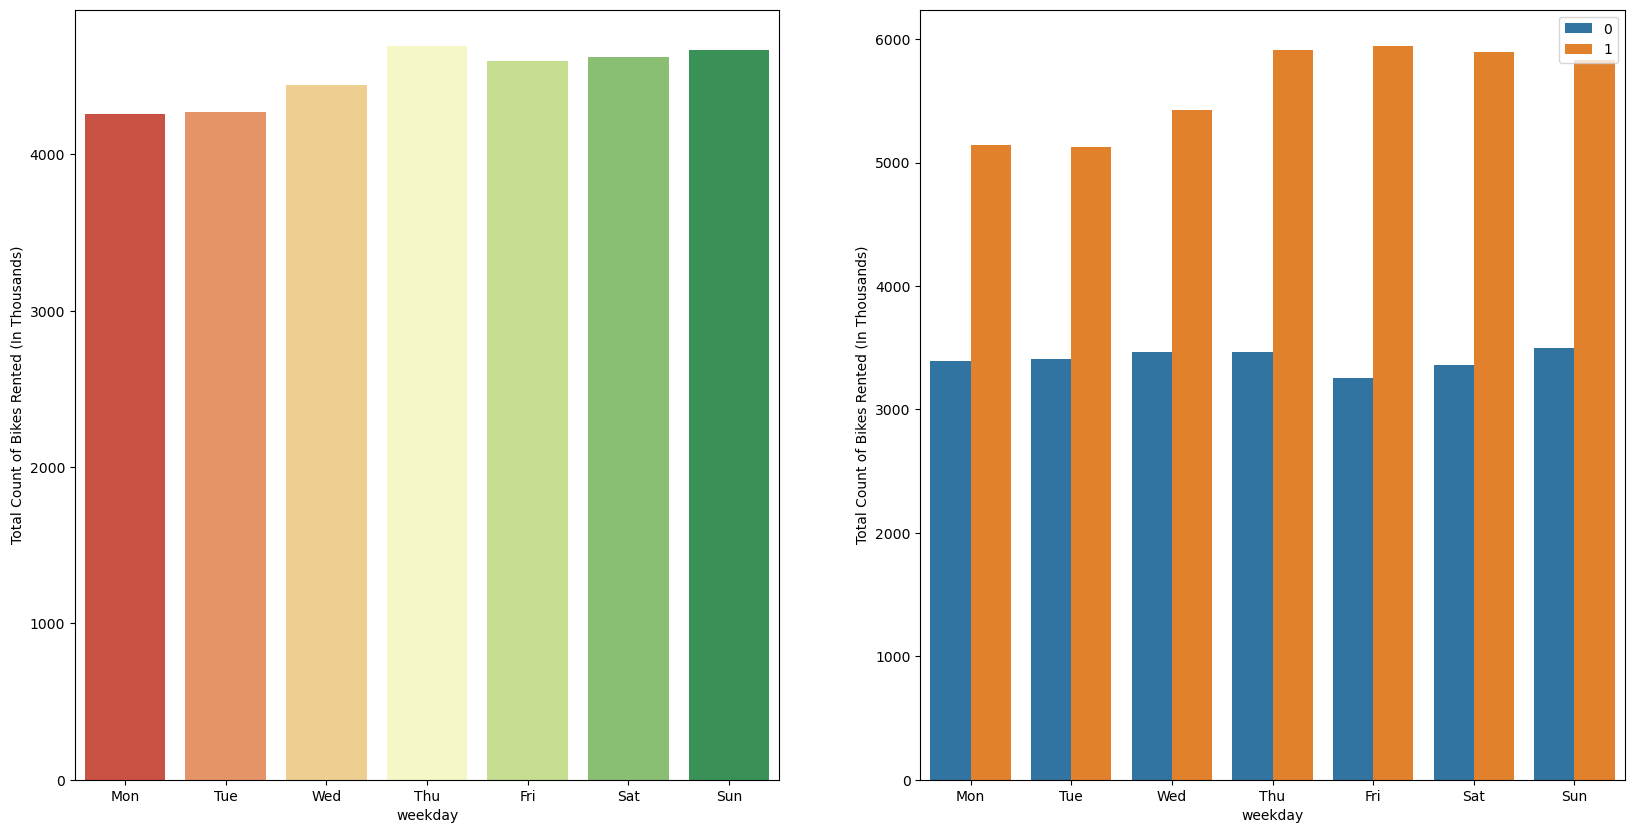

In [28]:
category_column_graphs(bikedata_renamed, "weekday")

##### *Inference: 
The bulk of reservations occurs in the latter part of the week, specifically from Thursday through Sunday. This suggests that people tend to make their bookings closer to the weekend.*

##### Note: 
- *0: 2018*
- *1: 2019*

##### d) Checking the total count of rental bikes on holidays

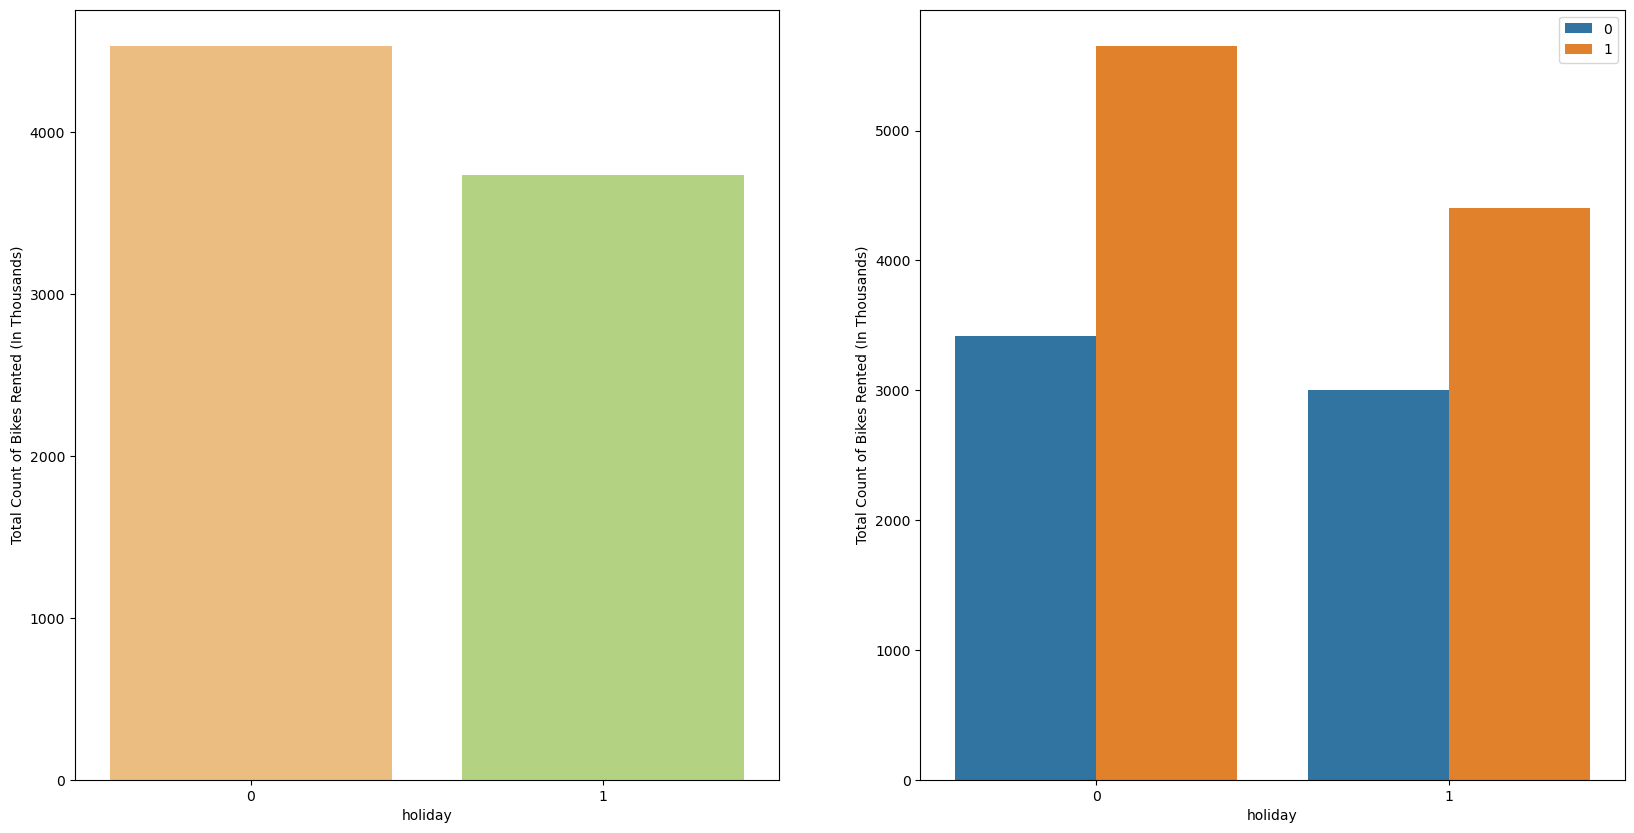

In [29]:
category_column_graphs(bikedata_renamed, "holiday")

##### *Inference:*

0 - Not a Holiday
1 - A Holiday

Bookings tend to be higher on non-holiday days, as it aligns with the idea that people prefer to stay at home or spend quality time with their families on holidays.

##### Note: 
- *0: 2018*
- *1: 2019*

##### e) Checking the total count of rental bikes across various seasons

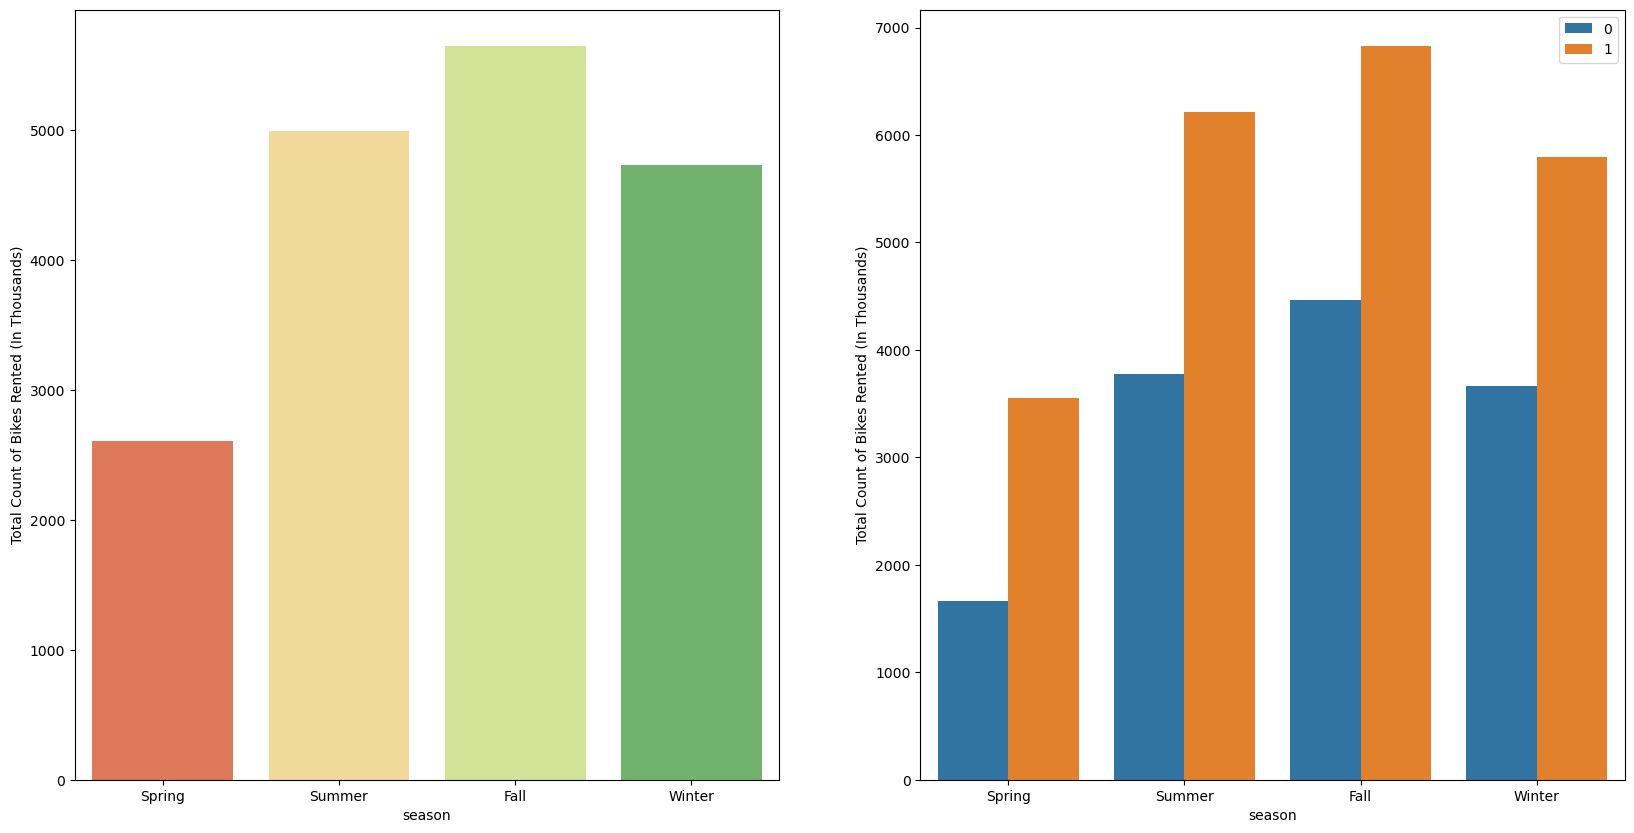

In [30]:
category_column_graphs(bikedata_renamed, "season")

##### *Inference:*

*1. "Fall" season has the highest booking followed by "Summer" season.*

*2. In contrast to 2018, there has been a noticeable rise in bike bookings for every season in 2019.*

##### Note: 
- *0: 2018*
- *1: 2019*

##### f) Checking the total count of rental bikes across various weather situations

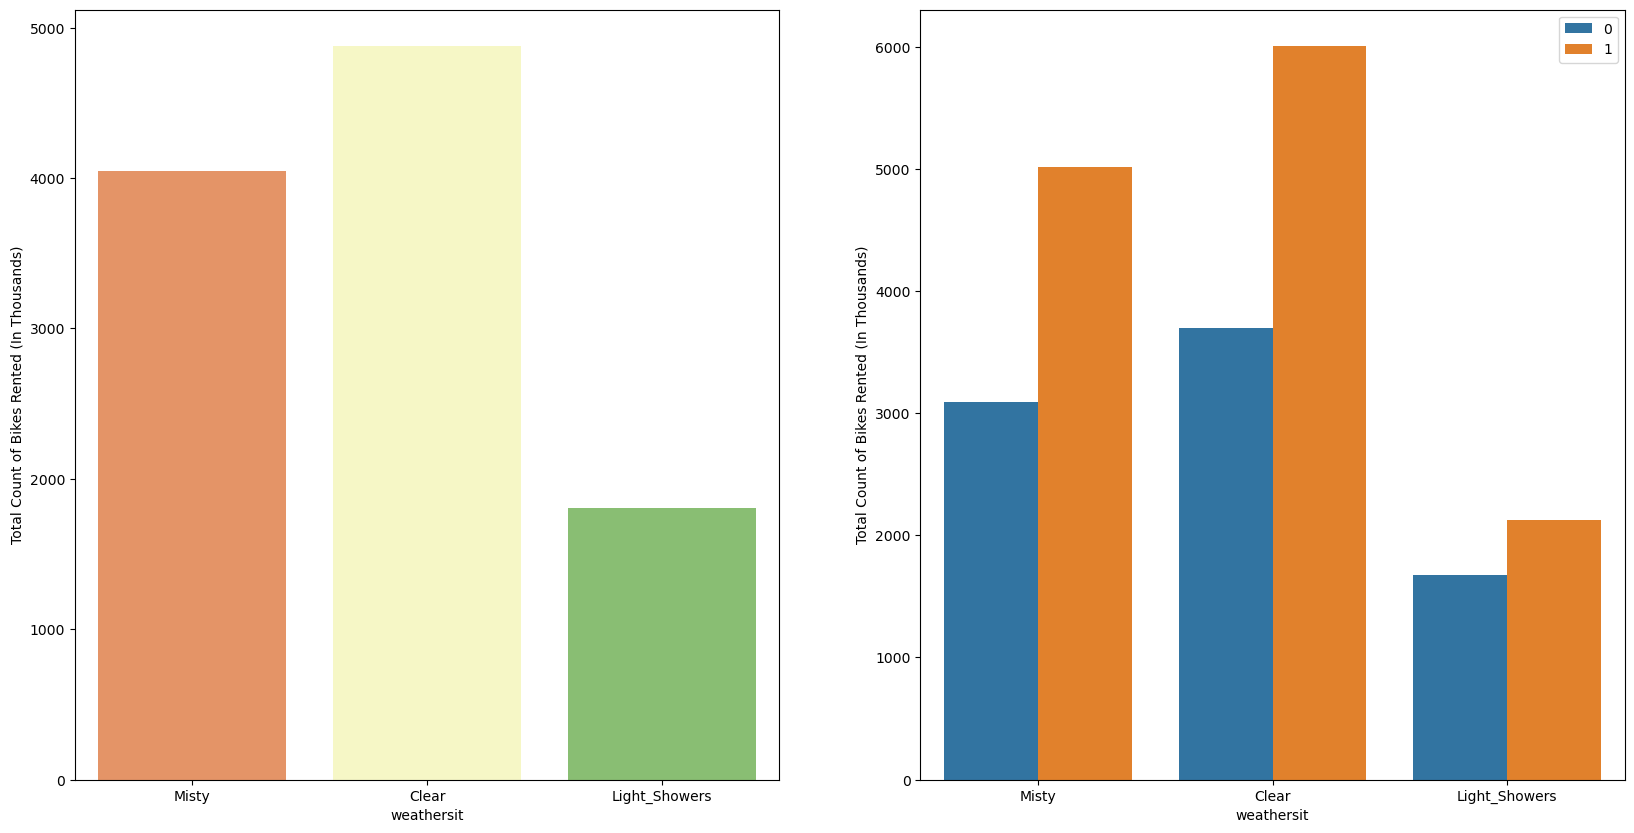

In [31]:
category_column_graphs(bikedata_renamed, "weathersit")

##### *Inference:*

*1. The most popular weather condition for bookings has been "Clear" weather, with "Misty" weather coming in as the second most preferred choice for bike bookings.*

*2. In comparison to 2018, there has been a noticeable increase in bike bookings for every type of weather condition in 2019.*

##### Note: 
- *0: 2018*
- *1: 2019*

### ii) Visualising Numerical Variables

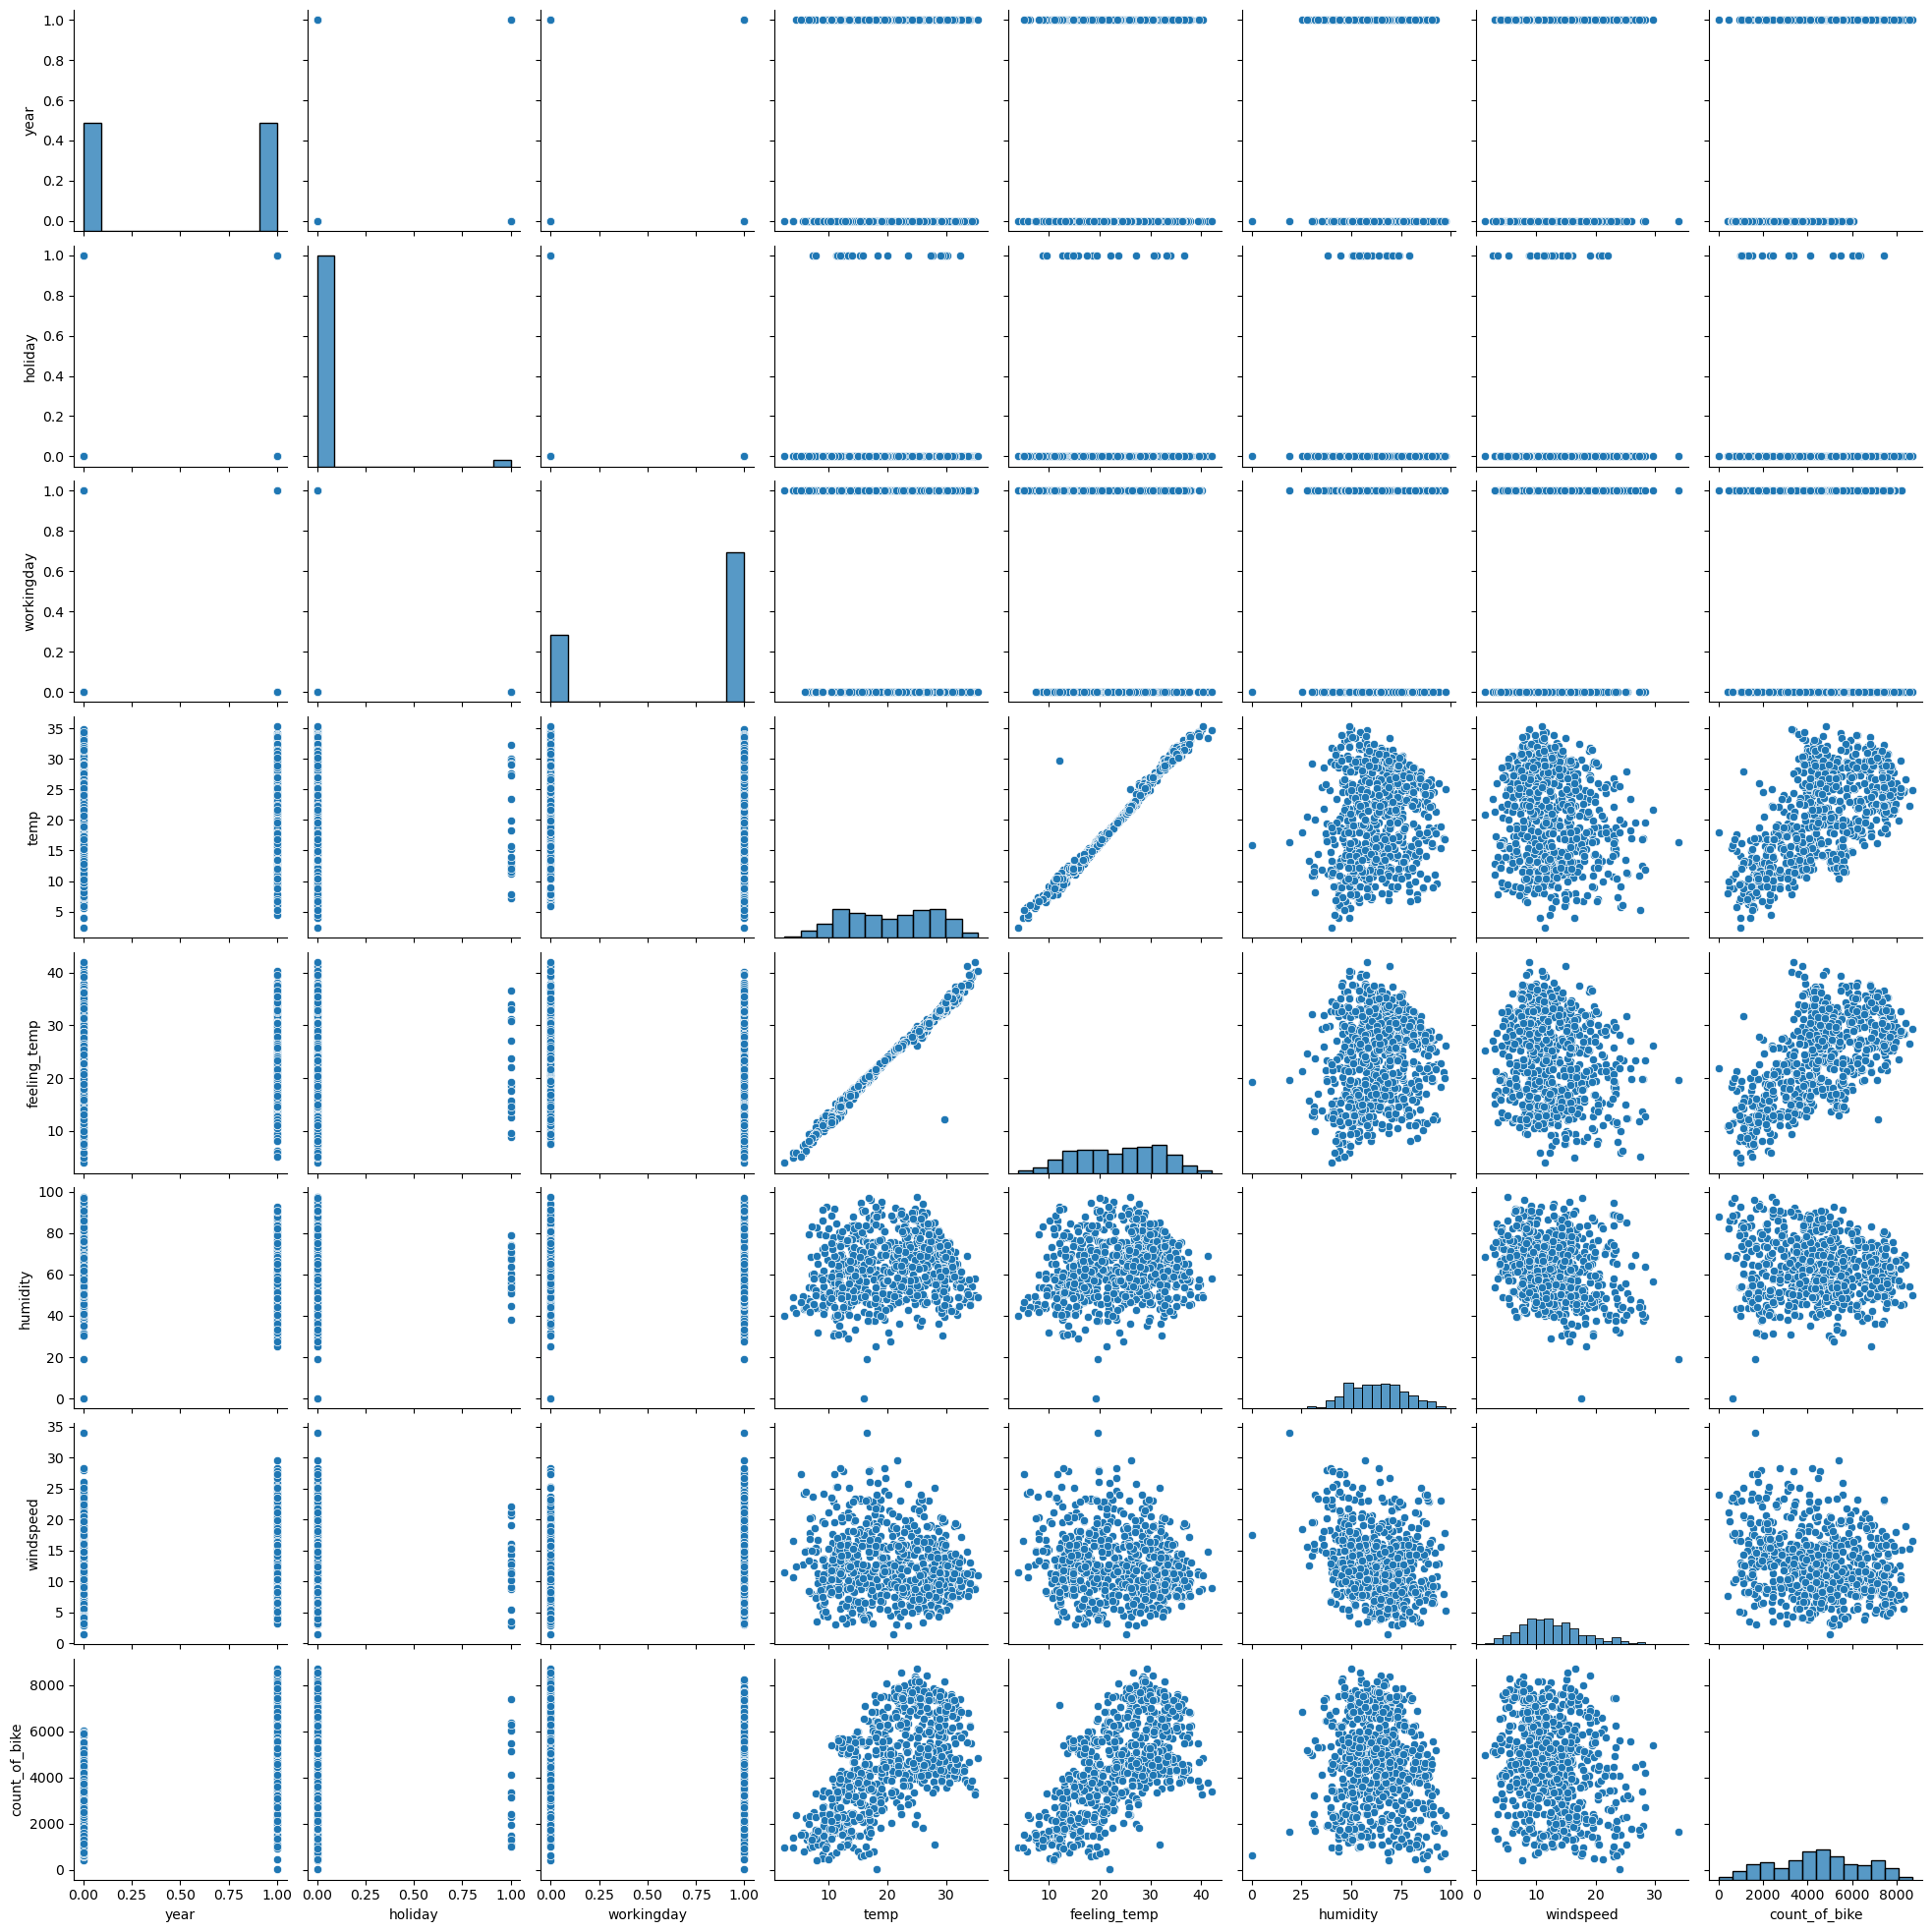

In [32]:
#Plotting pairplot for all numerical variables

sns.pairplot(bikedata_renamed)
plt.show()

##### *Inference:*

"holiday" and "workingday" don't seem to have too much affect on the target variable. Hence, creating pairplot again where these two columns aren't considered

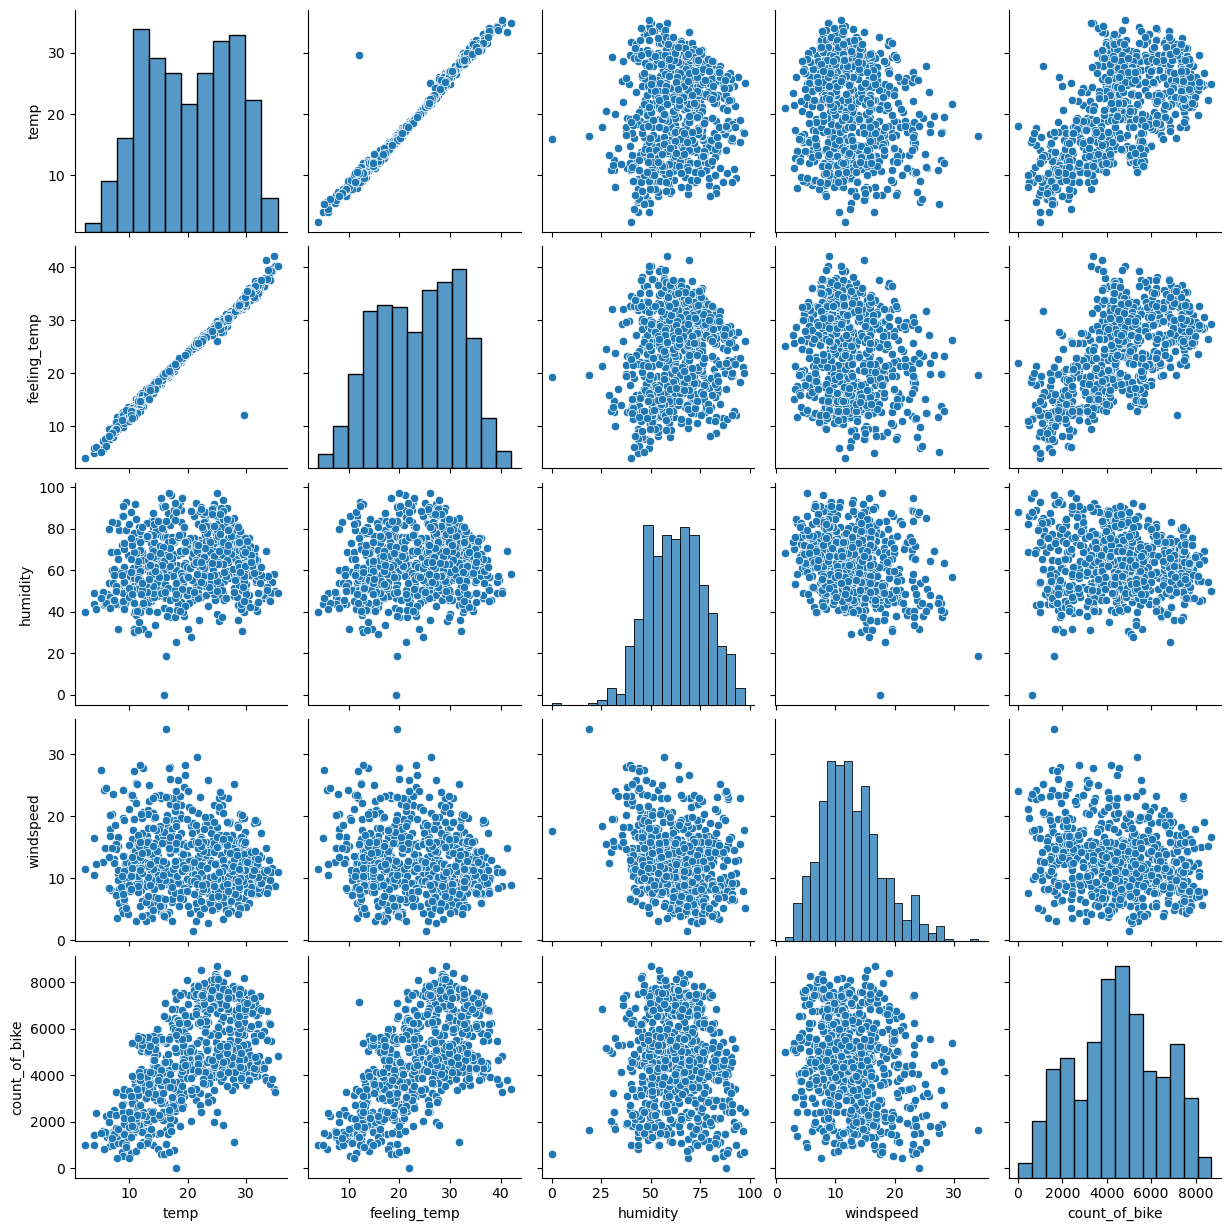

In [33]:
#Creating pairplots again after selecting only a few numerical columns

sns.pairplot(data=bikedata_renamed,vars=['temp','feeling_temp','humidity','windspeed','count_of_bike'])
plt.show()

##### *Inference:*

*1. "temp" and "feeling_temp" exhibit a correlation with each other. We will need to eliminate one of these columns based on their p-value and VIF score.*

*2. A relationship is evident between the target variable, "count_of_bike" and both "temp" and "feeling_temp".*

In [34]:
bikedata_renamed.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'feeling_temp', 'humidity', 'windspeed',
       'count_of_bike', 'day'],
      dtype='object')

In [35]:
bikedata_renamed.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feeling_temp,humidity,windspeed,count_of_bike,day
0,Spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985,01
1,Spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801,02
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,03
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,04
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,05


## Step 4: Data Preparation for Multiple Linear Regression Analysis

#### *We need to create dummy variables for the following "Categorical Nominal" variables-  "month", "weekday", "weathersit" and "season"*

In [36]:
#Creating dummy variables for "month"
df_months = pd.get_dummies(bikedata_renamed.month,drop_first = True)

#Creating dummy variables for "weekdays"
df_weekdays = pd.get_dummies(bikedata_renamed.weekday,drop_first = True)

#Creating dummy variables for "weathersit"
df_weathersit = pd.get_dummies(bikedata_renamed.weathersit,drop_first = True)

#Creating dummy variables for "seasons"
df_seasons = pd.get_dummies(bikedata_renamed.season,drop_first = True)

In [37]:
#Checking first five rows of the dataset

bikedata_renamed.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feeling_temp,humidity,windspeed,count_of_bike,day
0,Spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985,01
1,Spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801,02
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,03
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,04
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,05


In [38]:
#Checking the number of rows and columns

bikedata_renamed.shape

(730, 13)

In [39]:
#Merging the newly created dummy variables with our dataset

bikedata_merged = pd.concat([bikedata_renamed, df_months, df_weekdays, df_weathersit, df_seasons], axis=1)

In [40]:
#Checking the first five rows of the dataset

bikedata_merged.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feeling_temp,humidity,windspeed,count_of_bike,day,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Showers,Misty,Spring,Summer,Winter
0,Spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985,01,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1,Spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801,02,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,03,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,04,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,05,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
#Checking the number of rows and columns

bikedata_merged.shape

(730, 35)

In [42]:
#Creating a new dataframe in order to check for duplicates

bikedata_merged_dup_check = bikedata_merged

In [43]:
#Checking number of rows and columns after dropping the duplicates

bikedata_merged_dup_check.drop_duplicates().shape

(730, 35)

#### *Inference: As the shape of the dataset remains same after dropping duplicates, it means that there are no duplicate rows present in dataset.*

In [44]:
# Dropping the source variables of all the "dummy variables" that we have created

source_cols_to_drop = ["month", "weekday", "season", "weathersit"]

bikedata_merged = bikedata_merged.drop(source_cols_to_drop, axis=1)

In [45]:
bikedata_merged.shape

(730, 31)

In [46]:
bikedata_merged.head()

,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,count_of_bike,day,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Showers,Misty,Spring,Summer,Winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,01,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,02,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,03,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,04,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,05,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Data into Training Set and Test Set

#### Here, we will split the data into the follwing two sets on the basis of 70:30 split of data-
- Training Set: We will rescale our data and construct our model using a dataset that comprises 70% of the values from the original dataset
- Test Set: After constructing our model, we will evaluate its performance using a dataset consisting of the remaining 30% of values

In [47]:
# Using 70:30 split for creating Train and Test Data Set

np.random.seed(0)
df_train, df_test = train_test_split(bikedata_merged, train_size = 0.7, random_state = 100)

In [48]:
#Checking number of rows and columns in "Train Dataset"

df_train.shape

(510, 31)

In [49]:
#Checking number of rows and columns in "Test Dataset"

df_test.shape

(220, 31)

## Step 5: Normalising the Numerical Variables in the Dataset

#### *In this step, we will normalise the numerical variables in the dataset using min-max scaler. We will omit the binary numerical variables (Yes/No) and the dummy variables since their values are already between 0 and 1.* 

In [50]:
#Instantiating an object

scaler = MinMaxScaler()

In [51]:
bikedata_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   feeling_temp   730 non-null    float64
 5   humidity       730 non-null    float64
 6   windspeed      730 non-null    float64
 7   count_of_bike  730 non-null    int64  
 8   day            730 non-null    object 
 9   Aug            730 non-null    uint8  
 10  Dec            730 non-null    uint8  
 11  Feb            730 non-null    uint8  
 12  Jan            730 non-null    uint8  
 13  July           730 non-null    uint8  
 14  June           730 non-null    uint8  
 15  Mar            730 non-null    uint8  
 16  May            730 non-null    uint8  
 17  Nov            730 non-null    uint8  
 18  Oct       

In [52]:
bikedata_merged.describe()

,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,count_of_bike,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Showers,Misty,Spring,Summer,Winter
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.028767,0.336986,0.246575,0.252055,0.243836
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.167266,0.473004,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
#Creating a list for the numerical variables to be scaled

num_cols_to_scale = ["year", "temp", "feeling_temp", "humidity", "windspeed", "count_of_bike"]
df_train[num_cols_to_scale] = scaler.fit_transform(df_train[num_cols_to_scale])

In [54]:
#Confirming the normalisation of the numerical variables

df_train.describe()

,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,count_of_bike,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Showers,Misty,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


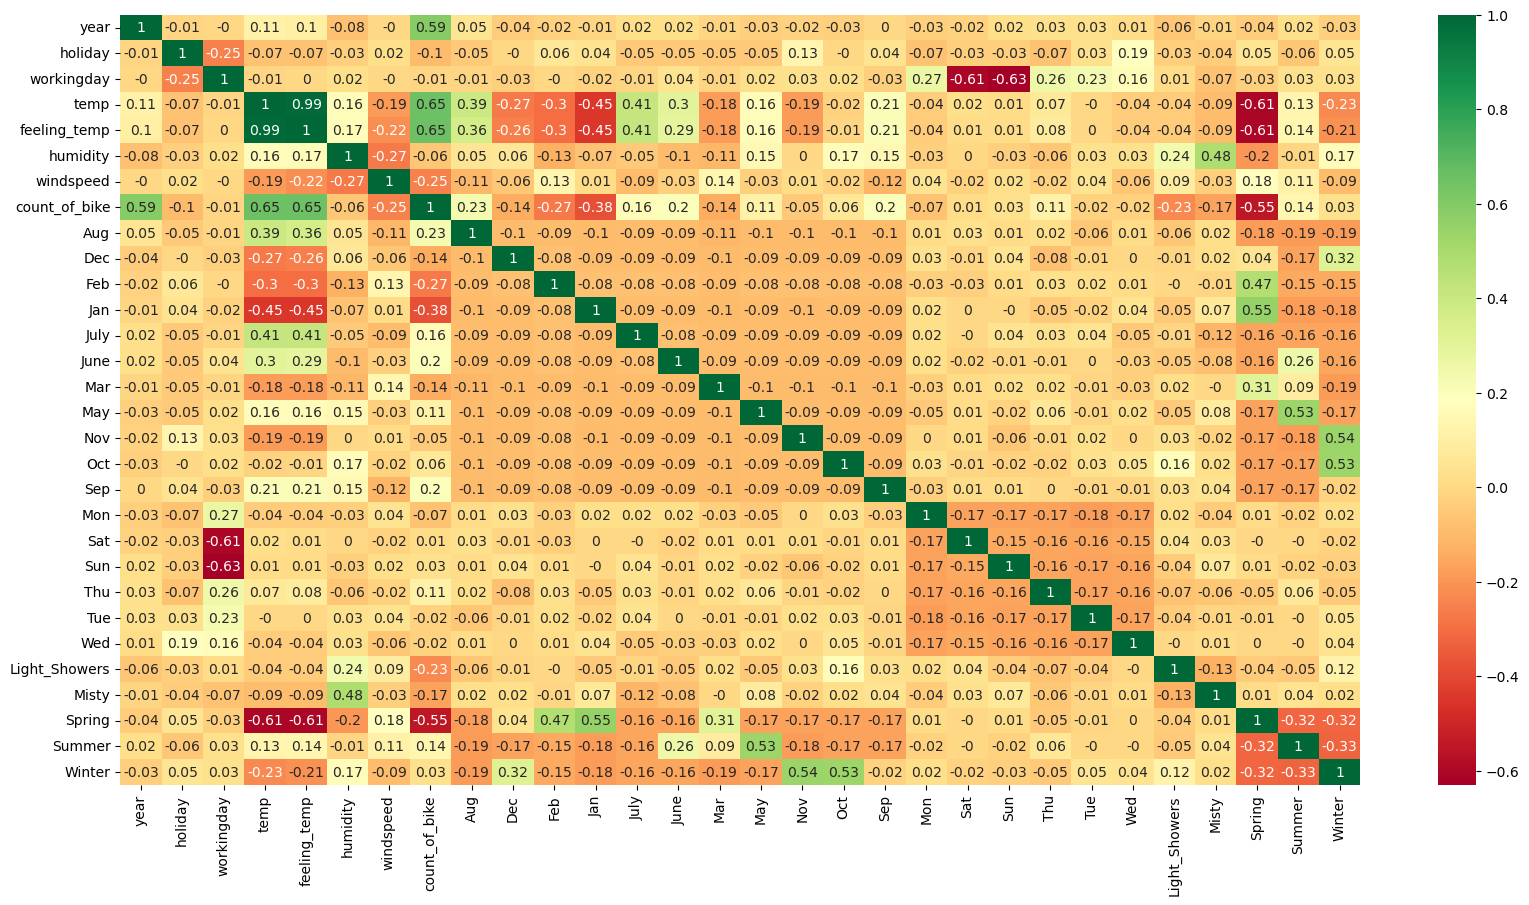

In [55]:
#Building a heatmap to check the correlation between the variables

plt.figure(figsize=(20, 10))
sns.heatmap(round(df_train.corr(), 2), annot=True, cmap='RdYlGn')
plt.show()

#### Following are some inferences from the heatmap-

- count_of_bike: Variable shows a significant positive correlation with "year", "temp" and "feeling_temp" and negative correlation with "spring" ad "jan"

- "temp" and "feeling_temp" show a high correlation

- "workingday" show a significant negative correlation with "Sat" and "Sun" (i.e, Weekend Days)

- "humidity" and "misty" show a significant correlation



## Step 5: Building the Multiple Linear Regression Model via an Iterative Process

#### Dividing the "Train Dataset" into X and Y datasets for model building

In [56]:
#Popping out "count_of_bike" variable and storing it as "y_train" (Target Variable)
y_train = df_train.pop("count_of_bike")

#The dataset containing the remaining variables becomes our "X_train" (Predictor Variables)
X_train = df_train

#### Using Recursive Feature Elimination (RFE) Method to select Top 15 Variables

In [57]:
# Using RFE Method to select Top 15 Predictor Variables

#Instantiating an object
lm = LinearRegression()

#Fitting the Linear Regression Model on training dataset
lm.fit(X_train, y_train)

#Using RFE and setting count to 15 to select Top 15 Predictor Variables
rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [58]:
# Creating a dataframe for RFE Values

df_rfe = pd.DataFrame({"Predictor": X_train.columns, "Select Status": rfe.support_, "Ranking": rfe.ranking_})

#Sorting the Predictor variables in decreasing order of their importance
df_rfe.sort_values(by="Ranking")

,Predictor,Select Status,Ranking
0,year,True,1
27,Spring,True,1
26,Misty,True,1
25,Light_Showers,True,1
18,Sep,True,1
16,Nov,True,1
28,Summer,True,1
12,July,True,1
11,Jan,True,1
29,Winter,True,1


In [59]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True, False, False,
        True, False,  True,  True, False, False, False,  True, False,
        True, False, False, False, False, False, False,  True,  True,
        True,  True,  True])

In [60]:
#Selecting the Top 15 Columns selected by RFE

rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'Dec', 'Jan',
       'July', 'Nov', 'Sep', 'Light_Showers', 'Misty', 'Spring', 'Summer',
       'Winter'],
      dtype='object')


In [61]:
# Finding columns that have been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'feeling_temp', 'day', 'Aug', 'Feb', 'June', 'Mar', 'May',
       'Oct', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [62]:
# Making a function that will calculate the VI values for us

def vif_calculate(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [63]:
# Making a new X_train dataframe by selecting the Top 15 variables provided by RFE

X_train_rfe = X_train[rfe_cols]

#### Building a Multiple Linear Regression Model  ||  Model Iteration 1

In [64]:
#Building 1st Linear Regression Model (Using RFE Columns)

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train, X_train_lm_1).fit()

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:          count_of_bike   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          8.15e-189
Time:                        19:45:45   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859

In [65]:
#Calculating VIF Score for the X_train using "vif_calculate" function

vif_calculate(X_train_rfe)

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
12,Spring,4.37
14,Winter,4.06
13,Summer,2.82
11,Misty,2.32
0,year,2.09
8,Nov,1.85
6,Jan,1.75


#### Following are some inferences from the First Model-

- "Dec" and "Nov" have p-values close to 0.05
- "humidity" and "temp" have high VIF score

Hence, we will first drop "Dec" column and see if the VIF score improves or not. Next, we will drop the "Nov" column and see the VIF score. If the VIF score of any variable is > 5, we will drop that variable as well.



#### Building a Multiple Linear Regression Model  ||  Model Iteration 2

In [66]:
# As "Dec" has a higher p-value, we will drop the column

X_train_new = X_train_rfe.drop(["Dec"], axis = 1)

In [67]:
#Building 2nd Linear Regression Model (After Dropping "Dec" variable)

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train, X_train_lm_2).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:          count_of_bike   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          4.41e-189
Time:                        19:45:45   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3032      0.035      8.598

In [68]:
#Calculating VIF Score for the X_train_lm_2 using "vif_calculate" function for Linear Model 2

vif_calculate(X_train_new)

,Features,VIF
3,humidity,29.09
2,temp,16.80
4,windspeed,4.72
11,Spring,4.37
13,Winter,3.78
12,Summer,2.80
10,Misty,2.29
0,year,2.09
5,Jan,1.67
7,Nov,1.60


#### Following are some inferences from the Second Model-

- "Jan" and "Nov" have p-values more than 0.05
- "humidity" and "temp" still have high VIF score

Hence, we will first drop "Jan" column and see if the VIF score improves or not. Next, we will drop the "Nov" column and see the VIF score. If the VIF score of any variable is > 5, we will drop that variable as well.

#### Building a Multiple Linear Regression Model  ||  Model Iteration 3

In [69]:
# As "Jan" has a higher p-value, we will drop the column

X_train_new = X_train_new.drop(["Jan"], axis = 1)

In [70]:
#Building 3rd Linear Regression Model (After Dropping "Jan" variable)

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train, X_train_lm_3).fit()

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:          count_of_bike   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.0
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          1.94e-189
Time:                        19:45:46   Log-Likelihood:                 510.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     496   BIC:                            -933.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2910      0.035      8.364

In [71]:
#Calculating VIF Score for the X_train_lm_3 using "vif_calculate" function for Linear Model 3

vif_calculate(X_train_new)

,Features,VIF
3,humidity,28.10
2,temp,16.12
4,windspeed,4.71
10,Spring,4.04
12,Winter,3.75
11,Summer,2.80
9,Misty,2.29
0,year,2.08
6,Nov,1.60
5,July,1.58


#### Following are some inferences from the Third Model-

- The p-value of "Nov" is more than 0.05
- VIF score for "humidity" and "temp" has reduced but is still >5

Hence, we will drop "Nov" column and see if the VIF score improves or not. If the VIF score of any variable is > 5, we will drop that variable as well.

#### Building a Multiple Linear Regression Model  ||  Model Iteration 4

In [72]:
# As "Nov" has a higher p-value, we will drop the column

X_train_new = X_train_new.drop(["Nov"], axis = 1)

In [73]:
#Building 4th Linear Regression Model (After Dropping "Nov" variable)

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train, X_train_lm_4).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:          count_of_bike   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.95e-190
Time:                        19:45:46   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2848      0.034      8.258

In [74]:
#Calculating VIF Score for the X_train_lm_4 using "vif_calculate" function for Linear Model 4

vif_calculate(X_train_new)

,Features,VIF
3,humidity,28.03
2,temp,16.03
4,windspeed,4.65
9,Spring,4.01
11,Winter,3.33
10,Summer,2.79
8,Misty,2.28
0,year,2.08
5,July,1.58
6,Sep,1.38


#### Following are some inferences from the Fourth Model-

- The p-value of all the columns is < 5 which is a good sign.
- VIF score for "humidity" and "temp" has reduced but is still >5.

Hence, we will drop "humidity" column and see if the VIF score improves or not. If the VIF score of any variable is > 5, we will drop that variable as well.

#### Building a Multiple Linear Regression Model  ||  Model Iteration 5

In [75]:
# As "humidity" has a higher VIF score, we will drop the column

X_train_new = X_train_new.drop(["humidity"], axis = 1)

In [76]:
#Building 5th Linear Regression Model (After Dropping "humidity" variable)

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train, X_train_lm_5).fit()

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:          count_of_bike   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          5.06e-187
Time:                        19:45:47   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746

#### Calculating VIF score for Multiple Linear Regression Model 5-
<a id='vif_lm_5_values'></a>

In [77]:
#Calculating VIF Score for the X_train_lm_5 using "vif_calculate" function for Linear Model 5

vif_calculate(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,Summer,2.23
8,Spring,2.08
0,year,2.07
10,Winter,1.78
4,July,1.58
7,Misty,1.55
5,Sep,1.34
6,Light_Showers,1.08


#### Following are some inferences from the Fifth Model-

- The p-value of all the columns is < 5 which is a good sign.
- VIF score for "temp" has reduced but is still >5.

Hence, we will drop "temp" column. If the VIF score of any variable is > 5, we will drop that variable as well.

#### Building a Multiple Linear Regression Model  ||  Model Iteration 6

In [78]:
# As "humidity" has a higher VIF score, we will drop the column

X_train_new = X_train_new.drop(["temp"], axis = 1)

In [79]:
#Building 6th Linear Regression Model (After Dropping "humidity" variable)

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train, X_train_lm_6).fit()

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:          count_of_bike   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          5.02e-149
Time:                        19:45:47   Log-Likelihood:                 406.16
No. Observations:                 510   AIC:                            -790.3
Df Residuals:                     499   BIC:                            -743.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5837      0.017     34.708

In [80]:
#Calculating VIF Score for the X_train_lm_6 using "vif_calculate" function for Linear Model 6

vif_calculate(X_train_new)

,Features,VIF
2,windspeed,3.81
7,Spring,2.07
8,Summer,2.01
0,year,1.83
9,Winter,1.73
6,Misty,1.52
3,July,1.19
4,Sep,1.16
5,Light_Showers,1.08
1,holiday,1.04


#### Following are some inferences from the Sixth Model-

- The p-value of all the columns is < 5 which is a good sign.
- VIF score for all variables is < 5.
- The "R-squared" value of 6th Model is 0.763 whereas for 5th Model it was 0.835. This is a significant drop in the value which isn't ideal.

Hence, we will use the coefficients from the **5th Model** as it provided us the best values of "R-squared" and "Prob (F-statistic)"".

#### Model Selection  ||  Reasons for Selecting Model Number 5

In [81]:
# Printing the Summary of Model 5

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:          count_of_bike   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          5.06e-187
Time:                        19:45:48   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746

#### Reasons for Selecting Model 5-

- Low multicollinearity between the predictor variables
- P-values of all the predictor variables is very low indicating that they are significant
- "R-squared" value is 0.835 and "Adj. R-squared" value is 0.832 which are good indicators
- Prob (F-statistic) is very low and almost equal to zero

All the above mentioned reasons help us in concluding that the overall model is performing well and is significant.

In [82]:
#Checking the Parameters of Model 5

lr_5.params

const            0.199434
year             0.233570
holiday         -0.097463
temp             0.490988
windspeed       -0.147919
July            -0.052057
Sep              0.076846
Light_Showers   -0.284199
Misty           -0.080167
Spring          -0.067169
Summer           0.046487
Winter           0.081741
dtype: float64

In [83]:
#Predicting the values using Linear Regression Model 5

y_train_pred = lr_5.predict(X_train_lm_5)

## Step 7: Proof of the Assumptions of Linear Regression

#### Assumption 1: Linear relationship
- One crucial assumption posits the existence of a linear relationship between the independent and dependent variables.

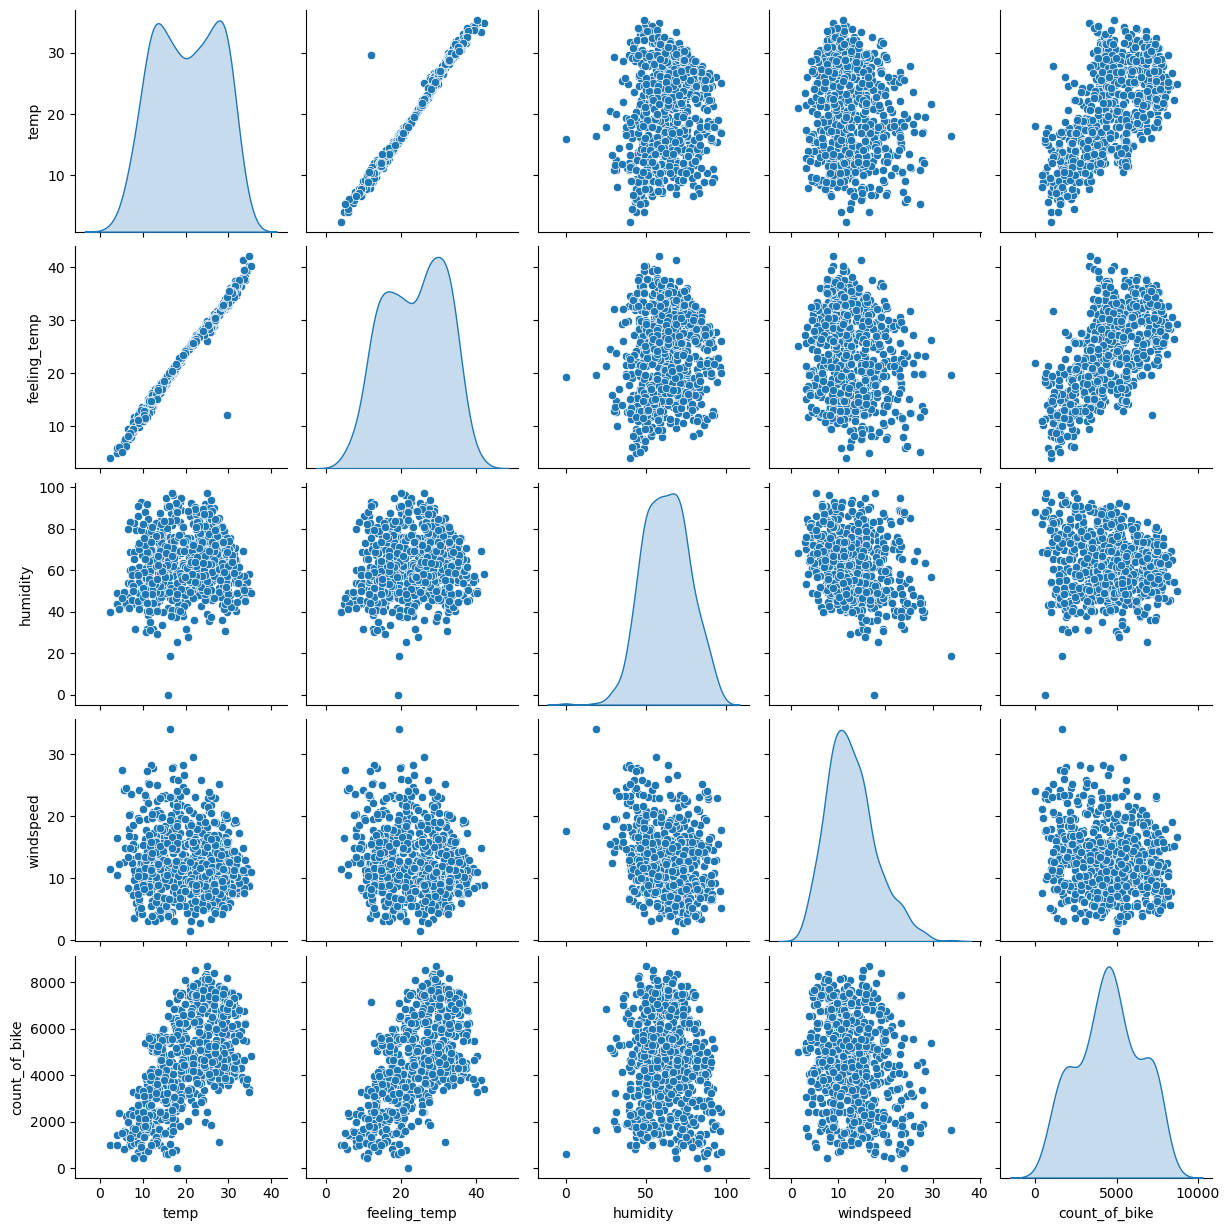

In [84]:
#Plotting the pairplot between a few predictor variables and the target variable "count_of_bike"

sns.pairplot(data=bikedata_renamed,vars=['temp','feeling_temp','humidity','windspeed','count_of_bike'], diag_kind='kde')
plt.show()

##### *Inference:*

By examining the pair plot, we can observe a linear relationship between the "temp" and "feeling_temp" variables with the predictor "count_of_bike".

#### Assumption 2: No auto-correlation i.e, Assumption of Error Terms Being Independent

- The error terms, or residuals, exhibit independence from one another, indicating that there is no correlation between successive error terms in the time series data.

- For this we will perform The Durbin-Watson statistic test

    The value typically falls between 0 and 4, where:
    
    - A value close to 2 indicates no significant autocorrelation.
    - A value less than 2 suggests positive autocorrelation (residuals are correlated).
    - A value greater than 2 suggests negative autocorrelation (residuals are inversely correlated).

In [85]:
# Calculating the Durbin-Watson statistic

residuals = y_train - y_train_pred

dw_stat = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson Statistic value:", dw_stat)

Durbin-Watson Statistic value: 2.0508606014647115


##### *Inference:*

The Durbin-Watson Statistic value of our model comes out to be 2.051 which is close to 2. Hence, this indicates no significant autocorrelation between the error terms.

#### Assumption 3: No Multicollinearity
- It is important that the independent variables do not exhibit correlations. If multicollinearity is present among the independent variables, it becomes difficult to make accurate predictions using the model.

- For this, we will calculate the VIF (Variation Inflation Factor)
    - VIF<=5 implies no multicollinearity.
    - VIF>5 implies serious multicollinearity.

#### We have already calculated the VIF values for each predictor variable of Multiple Linear Regression Model 5

#### Referencing to the cell that has the VIF values for Multiple Linear Regression Model 5-
[Click Here to Go To VIF values for Mulitple Linear Regression Model 5](#vif_lm_5_values)

##### *Inference:*

The VIF score for all predictor variables is <=5. Hence, this implies that the predictor variables do not exhibit correlations and there is no multicollinearity.

##### *Note: I have not used the function to calculate the VIF score since the "X_train_new" is linked to Multiple Linear Regression Model 6 instead of 5 as we went one model further to check the feasibility. Hence, referencing to the previous cell that contains the VIF score of Multiple Linear Regression Model 5*

#### Assumption 4: Assumption of Homoscedasticity
- Homoscedasticity refers to the condition where the residuals maintain a consistent variance across all levels of the independent variable.
- For this, we can create a scatter plot to assess homoscedasticity by plotting the residuals against the fitted values. 
    - In a scatter plot showing homoscedasticity, the data points are spread out evenly without a discernible pattern.

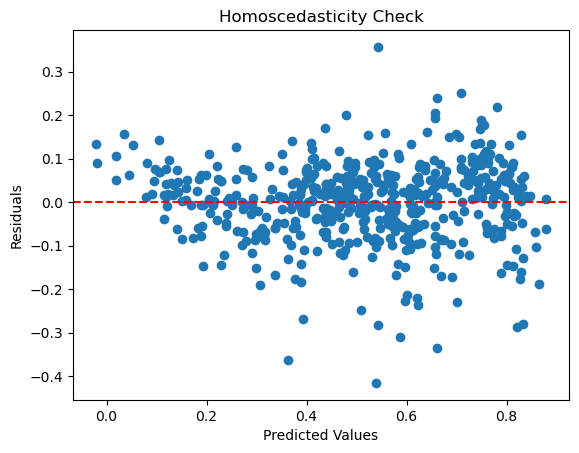

In [86]:
plt.scatter(y_train_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

##### *Inference:*

In the scatter plot of residuals versus fitted values above, we see that the data points are evenly distributed without any noticeable pattern, it suggests the presence of homoscedasticity, indicating that the residuals exhibit constant variance across the range of fitted values.

#### Assumption 5: Assumption of Normally Distributed Error Terms
- We need to prove that the distribution of error terms is normally distributed

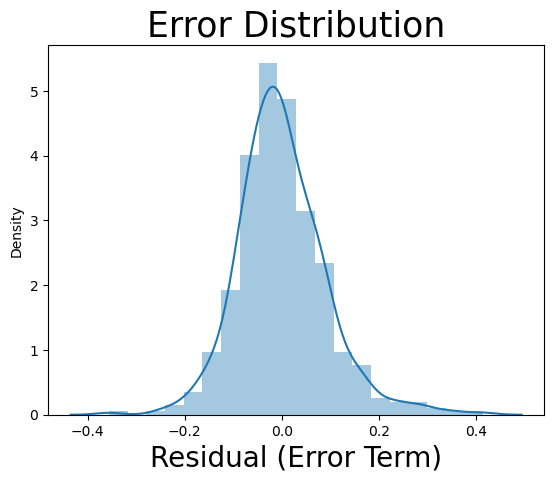

In [87]:
#Plotting the error terms

residual = y_train_pred - y_train
sns.distplot(residual, bins = 20) 
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})   # X-label 
plt.title('Error Distribution', fontdict={'fontsize': 25})       # Plot heading 
plt.show()

##### *Inference:*

We can see from the above graph that the Errors are normally distributed across zero suggesting that the model has handled the "Assumption of Normally Distributed Error Terms" properly.

## Step 8: Making Predictions on the Test Data Using the Selected Model (Model - 5)

In [88]:
#Applying scaling on the numerical variables of Test dataset the same way we did for Train dataset
 
df_test[num_cols_to_scale] = scaler.transform(df_test[num_cols_to_scale])

In [89]:
#Displaying first five rows of the dataset

df_test.head()

,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,count_of_bike,day,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Showers,Misty,Spring,Summer,Winter
184,0.0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,04,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
535,1.0,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,20,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
299,0.0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,27,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
221,0.0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0.0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,02,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [90]:
#Checking the summary of the Test dataset

df_test.describe()

,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,count_of_bike,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Showers,Misty,Spring,Summer,Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
#Popping out "count_of_bike" variable and storing it as "y_train" (Target Variable)
y_test = df_test.pop("count_of_bike")

#The dataset containing the remaining variables becomes our "X_test" (Predictor Variables)
X_test = df_test

In [92]:
#Creating a list of predictor variables that were provided by Multiple Linear Regression Model 5

predictor_varibles_lm_5 = ["year", "holiday", "temp", "windspeed", "July", "Sep", "Light_Showers", "Misty", "Spring", "Summer", "Winter"]

#Creating "X_test" dataset after selecting the above columns

X_test = X_test[predictor_varibles_lm_5]

# Adding constant variable to test dataset

X_test_lm_5 = sm.add_constant(X_test)

In [93]:
#Predicting the values using the Multiple Linear Regression Model - 5

y_test_pred = lr_5.predict(X_test_lm_5)

In [94]:
#Calculating "R-Squared" value after predicting using Multiple Linear Regression Model - 5

r2_score_lm_5 = r2_score(y_test, y_test_pred)
print("The R-Squared value is : ", round(r2_score_lm_5,3))

The R-Squared value is :  0.805


In [95]:
#Calculating the "Adj. R-Squared" value after predicting using Multiple Linear Regression Model - 5

adjusted_r2_score_lm_5 = round(1-(1-r2_score_lm_5)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),3)
print("The Adj. R-Squared value is : ", adjusted_r2_score_lm_5)

The Adj. R-Squared value is :  0.795


## Step 9: Model Evaluation

#### Now, we will plot a graph to see actual values of the dataset versus predicted values by the model

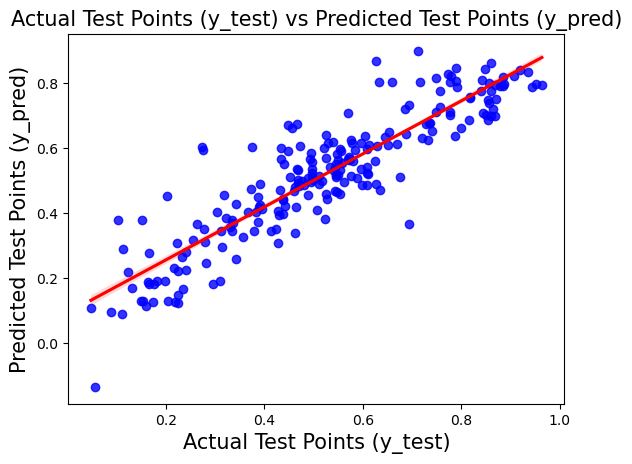

In [96]:
# Visualizing the fit on the test dataset

# Plotting a Regression plot

plt.figure()
sns.regplot(x = y_test, y = y_test_pred, ci=68, fit_reg = True, scatter_kws= {"color": "blue"}, line_kws ={"color": "red"})
plt.title("Actual Test Points (y_test) vs Predicted Test Points (y_pred)", fontsize=15)
plt.xlabel("Actual Test Points (y_test)", fontsize=15)
plt.ylabel("Predicted Test Points (y_pred)", fontsize=15)
plt.show()

## Step 10: Summary of Training and Test Dataset


#### Training Dataset:
    
- R-squared (R^2):   0.835
- Adj. R-squared (Adj. R^2):   0.832
    
#### Testing Dataset:
    
- R-squared (R^2):   0.805
- Adj. R-squared (Adj. R^2):   0.795

## Step 11: Mentioning the Predictor Variables and the Equation

In [97]:
#Checking the parameters of the Predictor Variables of Multiple Linear Regression Model - 5

round(lr_5.params,4)

const            0.1994
year             0.2336
holiday         -0.0975
temp             0.4910
windspeed       -0.1479
July            -0.0521
Sep              0.0768
Light_Showers   -0.2842
Misty           -0.0802
Spring          -0.0672
Summer           0.0465
Winter           0.0817
dtype: float64

##### *Inference:*

Demand of the Bikes depend on the following factors:

- year
- holiday
- temp
- windspeed
- July
- Sep
- Light_Showers
- Misty
- Spring
- Summer
- Winter

##### *Inference:*

Equation of our best-fitted line is:
    
**count_of_bike = 0.1994 + (year x 0.2336) - (holiday x 0.0975) + (temp x 0.4910) - (windspeed x 0.1479) - (July x 0.0521) + (Sep x 0.0768) - (Light_Showers x 0.2842) - (Misty x 0.0802) - (Spring x 0.0672) + (Summer x 0.0465) + (Winter x 0.0817)** 